In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [8]:

import matplotlib.pyplot as plt

In [9]:
iris = load_iris()

In [11]:
X = iris.data
y = iris.target

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential([
    keras.layers.Dense(300, input_shape=(4,), activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(3, activation='softmax')
])

In [17]:
model.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [19]:
history = model.fit(X_train,y_train, batch_size = 5,epochs = 100)

Train on 105 samples
Epoch 1/100
105/105 [==============================] - 1s 6ms/sample - loss: 1.0195 - accuracy: 0.4667
Epoch 2/100
105/105 [==============================] - 0s 693us/sample - loss: 0.7295 - accuracy: 0.6381
Epoch 3/100
105/105 [==============================] - 0s 684us/sample - loss: 0.5050 - accuracy: 0.7524
Epoch 4/100
105/105 [==============================] - 0s 513us/sample - loss: 0.4868 - accuracy: 0.7619
Epoch 5/100
105/105 [==============================] - 0s 256us/sample - loss: 0.4770 - accuracy: 0.7524
Epoch 6/100
105/105 [==============================] - 0s 247us/sample - loss: 0.3843 - accuracy: 0.8000
Epoch 7/100
105/105 [==============================] - 0s 266us/sample - loss: 0.3375 - accuracy: 0.8190
Epoch 8/100
105/105 [==============================] - 0s 266us/sample - loss: 0.3120 - accuracy: 0.8667
Epoch 9/100
105/105 [==============================] - 0s 256us/sample - loss: 0.2855 - accuracy: 0.8762
Epoch 10/100
105/105 [==============

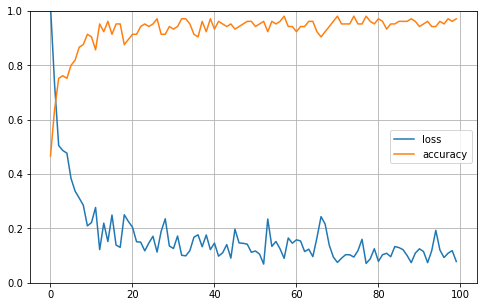

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
results = model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 2ms/sample - loss: 0.0389 - accuracy: 0.9778


In [28]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.038861
Final test set accuracy: 0.977778


In [30]:
class_name =  iris.target_names


In [31]:
X_new = X_test[:5]


In [32]:
y_pred = model.predict_classes(X_new)
print(np.array(class_name)[y_pred])

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [33]:
y_new = y_test[:5]
print(np.array(class_name)[y_new])

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
